# Simulación de Trayectoria de Proyectiles

Este programa permite ingresar, a través de una interfaz gráfica, los siguientes parámetros:
- **Velocidad inicial (v₀)**: Magnitud de la velocidad del proyectil.
- **Ángulo de lanzamiento (θ)**: Ángulo de disparo en grados.
- **Posición inicial (x₀, y₀)**: Coordenadas iniciales del proyectil.

## Estimaciones calculadas
Con los valores ingresados, el programa calculará:
- **Altura máxima (H)**: El punto más alto alcanzado por el proyectil.
- **Distancia máxima (D)**: La distancia horizontal total recorrida.
- **Tiempo total de vuelo (tᵥ)**: Duración del vuelo del proyectil.

## Funcionalidades adicionales:
- Se generará una lista con las posiciones `(x, y)` y velocidades `(vₓ, vᵧ)` en cada instante.
- Se mostrará una gráfica de la trayectoria parabólica del proyectil que incluirá:
  - Posición inicial `(x₀, y₀)`
  - Posición final `(x, y)`
  - Altura máxima `(xₕ, H)`

## Bibliotecas utilizadas
Para la simulación y visualización, se emplean las siguientes bibliotecas:
- **Matplotlib**: Para la generación de gráficos.
- **ipywidgets**: Para la creación de la interfaz gráfica interactiva.
- **Numpy**: Para realizar operaciones matemáticas y cálculos eficientes.

## Ecuaciones utilizadas
Las ecuaciones que rigen el movimiento del proyectil son las siguientes:

1. **Altura máxima (H)**:
   \[
   H = (v₀² * sin²(θ)) / (2 * g)
   \]
2. **Distancia máxima (D)**:
   \[
   D = (v₀² * sin(2θ)) / g
   \]
3. **Tiempo total de vuelo (tᵥ)**:
   \[
   tᵥ = (2 * v₀ * sin(θ)) / g
   \]

Donde:
- \( v₀ \): Velocidad inicial
- \( θ \): Ángulo de lanzamiento
- \( g \): Aceleración de la gravedad (aproximadamente 9.81 m/s²)


FloatSlider(value=7.5, continuous_update=False, description='Vo (m/s):', max=80.0, readout_format='.1f', step=…

FloatSlider(value=45.0, continuous_update=False, description='Ang (°):', max=90.0, readout_format='.1f', step=…

FloatSlider(value=0.0, continuous_update=False, description='X0 (m):', min=-100.0, readout_format='.1f', step=…

FloatSlider(value=0.0, continuous_update=False, description='Y0 (m):', readout_format='.1f', step=1.0)

Button(description='Lanzar', icon='check', style=ButtonStyle(), tooltip='Click me')

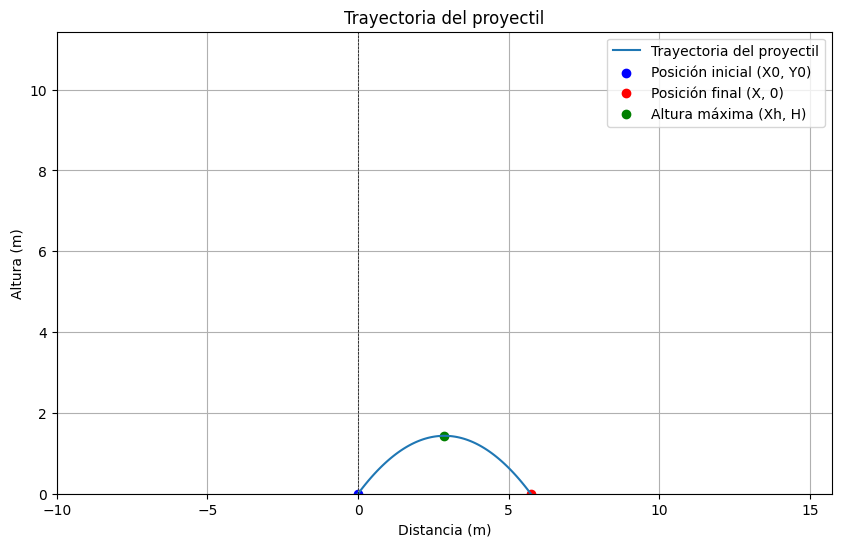

Altura máxima (H): 1.43 m
Distancia máxima (D): 5.73 m
Tiempo de vuelo (tv): 1.08 s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Para que las gráficas se muestren dentro del notebook
%matplotlib inline

# Parámetros iniciales
vo = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=80,
    step=1,
    description='Vo (m/s):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

ang = widgets.FloatSlider(
    value=45,
    min=0,
    max=90,
    step=1,
    description='Ang (°):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

xo = widgets.FloatSlider(
    value=0,
    min=-100,
    max=100,
    step=1,
    description='X0 (m):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

yo = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Y0 (m):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

start = widgets.Button(
    description='Lanzar',
    disabled=False,
    button_style='',
    tooltip='Click me',
    icon='check'
)
class MisilEnemigo:
    def __init__(self, vo, ang, xo, yo):
        self.vo = vo
        self.ang = np.radians(ang)
        self.g = 9.8
        self.hmax = 0
        self.dmax = 0
        self.tv = 0

    def formulasParabola(self):
        y0 = 0
        x0 = 0

        self.hmax = (self.vo**2 * np.sin(self.ang)**2) / (2 * self.g)
        self.dmax = (self.vo**2 * np.sin(2 * self.ang)) / self.g
        self.tv = (2 * self.vo * np.sin(self.ang)) / self.g
        print(f'Altura máxima (H): {self.hmax:.2f} m')
        print(f'Distancia máxima (D): {self.dmax:.2f} m')
        print(f'Tiempo de vuelo (tv): {self.tv:.2f} s')

        return self.hmax, self.dmax, self.tv

    def trayectoria(self):
        x = self.vo * np.cos(self.ang) * np.linspace(0, self.tv, 100)
        y = self.vo * np.sin(self.ang) * np.linspace(0, self.tv, 100)
    def lanzar_proyectil(b):
        # Convertir ángulo a radianes
        theta = np.radians(ang.value)

        # Componentes de la velocidad
        vx = vo.value * np.cos(theta)
        vy = vo.value * np.sin(theta)

        # Gravedad
        g = 9.81

        # Tiempo de vuelo
        tv = (2 * vo.value * np.sin(theta)) / g

        # Distancia máxima
        xmax = (vo.value**2 * np.sin(2 * theta)) / g

        # Altura máxima
        hmax = (vo.value**2 * np.sin(theta)**2) / (2 * g)

        # Crear listas de posiciones
        t = np.linspace(0, tv, num=100)
        x = xo.value + vx * t
        y = yo.value + vy * t - 0.5 * g * t ** 2

        # Graficar la trayectoria
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label='Trayectoria del proyectil')
        plt.scatter([xo.value], [yo.value], color='blue', label='Posición inicial (X0, Y0)')
        plt.scatter([xmax + xo.value], [0], color='red', label='Posición final (X, 0)')
        plt.scatter([xo.value + (vx * (tv / 2))], [yo.value + hmax], color='green', label='Altura máxima (Xh, H)')

        plt.title('Trayectoria del proyectil')
        plt.xlabel('Distancia (m)')
        plt.ylabel('Altura (m)')
        plt.xlim(xo.value - 10, xmax + xo.value + 10)
        plt.ylim(0, hmax + yo.value + 10)
        plt.axhline(0, color='black', lw=0.5, ls='--')
        plt.axvline(0, color='black', lw=0.5, ls='--')
        plt.grid()
        plt.legend()
        plt.show()

        # Mostrar resultados
        print(f'Altura máxima (H): {hmax:.2f} m')
        print(f'Distancia máxima (D): {xmax:.2f} m')
        print(f'Tiempo de vuelo (tv): {tv:.2f} s')

    # Conectar el botón a la función
    start.on_click(lanzar_proyectil)

    # Mostrar controles
    display(vo, ang, xo, yo, start)

# **Intercepcion de Misiles**
Este código simula la intercepción de un proyectil hostil con un proyectil interceptador, usando `ipywidgets` para ajustar parámetros como velocidad, ángulo, altura de intercepción y separación inicial. La simulación determina el tiempo y lugar de intercepción, graficando las trayectorias de ambos proyectiles.

### Componentes:
- **Deslizadores:** Para ajustar velocidad, ángulo, altura y separación.
- **Clases:**
  - `InterfazGrafica`: Calcula la trayectoria del proyectil hostil.
  - `ProyectilHostil`: Calcula la trayectoria del proyectil hostil.
  - `ProyectilInterceptador`: Calcula la trayectoria y parámetros del interceptador.
  
El resultado es una visualización interactiva que muestra las trayectorias y el punto de intercepción.



FloatSlider(value=4000.0, description='Velocidad (m/s):', max=8000.0, step=100.0)

FloatSlider(value=45.0, description='Ángulo (°):', max=90.0, step=1.0)

FloatSlider(value=400000.0, description='Altura Intercepción (m):', max=1000000.0, step=1000.0)

FloatSlider(value=8000.0, description='Separación Inicial (m):', max=16000.0, step=100.0)

Button(description='Lanzar', style=ButtonStyle(), tooltip='Click para lanzar el misil antiaéreo')

FloatSlider(value=7.5, continuous_update=False, description='Vo (m/s):', max=80.0, readout_format='.1f', step=…

FloatSlider(value=45.0, continuous_update=False, description='Ang (°):', max=90.0, readout_format='.1f', step=…

FloatSlider(value=0.0, continuous_update=False, description='X0 (m):', min=-100.0, readout_format='.1f', step=…

FloatSlider(value=0.0, continuous_update=False, description='Y0 (m):', readout_format='.1f', step=1.0)

Button(description='Lanzar', icon='check', style=ButtonStyle(), tooltip='Click me')

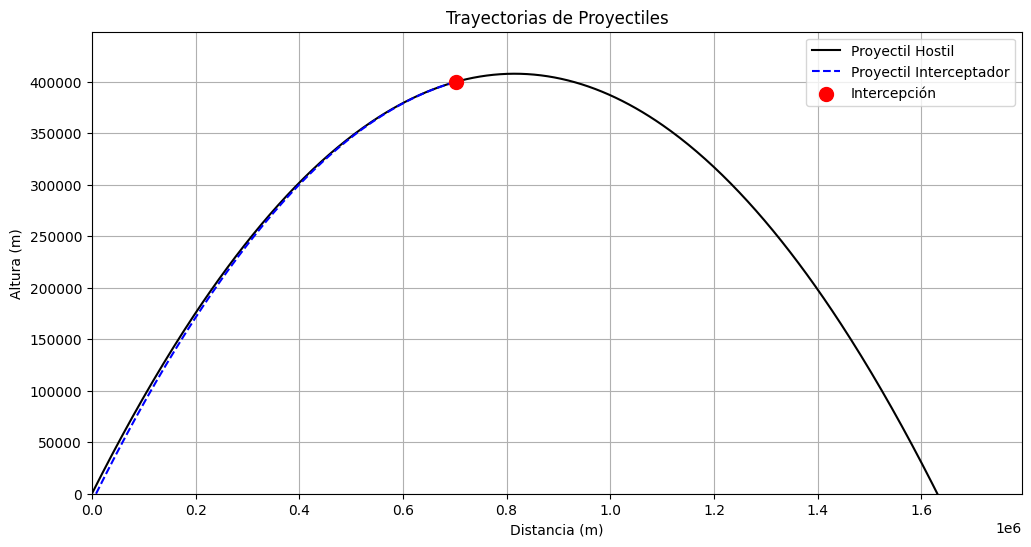

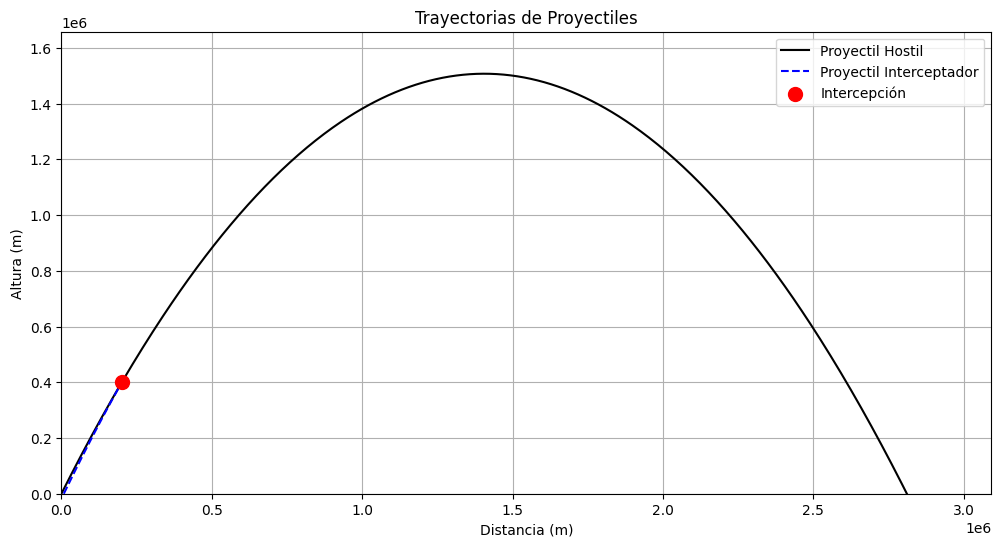

No se encontró un tiempo de intercepción válido.
No se encontró un tiempo de intercepción válido.
No se encontró un tiempo de intercepción válido.


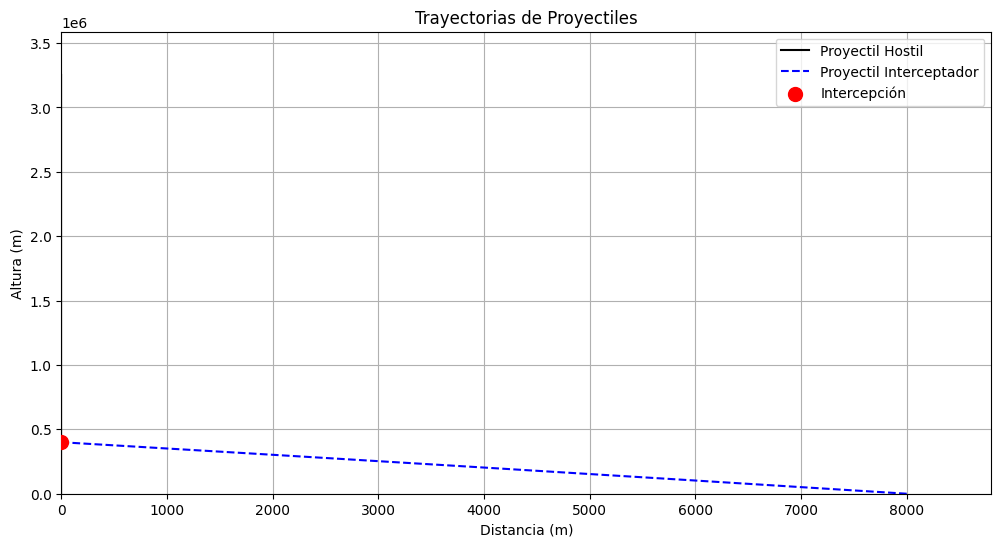

In [5]:
# Interfaz Gráfica (GUI)
# Importación de Librerías
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, Eq, sin, cos
import ipywidgets as widgets
from IPython.display import display

class InterfazGrafica:
    """
    Clase para crear una interfaz gráfica que permite simular el lanzamiento de un proyectil interceptador
    contra un proyectil hostil.
    """

    def __init__(self):
        # Widgets para los parámetros
        self.vo = widgets.FloatSlider(value=4000, min=0, max=8000, step=100, description='Velocidad (m/s):')
        self.ang = widgets.FloatSlider(value=45, min=0, max=90, step=1, description='Ángulo (°):')
        self.yo = widgets.FloatSlider(value=400000, min=0, max=1000000, step=1000, description='Altura Intercepción (m):')
        self.xo = widgets.FloatSlider(value=8000, min=0, max=16000, step=100, description='Separación Inicial (m):')

        # Botón para lanzar
        self.start = widgets.Button(description='Lanzar', button_style='', tooltip='Click para lanzar el misil antiaéreo')

        # Conectar el botón a la función
        self.start.on_click(self.on_button_click)

        # Mostrar los widgets
        display(self.vo, self.ang, self.yo, self.xo, self.start)

    # Función para manejar el evento del botón
    def on_button_click(self, b):
        """Ejecuta la simulación con los parámetros actuales cuando se hace clic en el botón."""
        self.ejecutar_simulacion(self.vo.value, self.ang.value, self.yo.value, self.xo.value)

    # Función para ejecutar la simulación con parámetros ajustados
    def ejecutar_simulacion(self, velocidad, angulo, altura_intercepcion, separacion_inicial):
        """
        Configura el proyectil hostil y calcula el tiempo de intercepción.

        :param velocidad: Velocidad del proyectil hostil.
        :param angulo: Ángulo de lanzamiento del proyectil hostil.
        :param altura_intercepcion: Altura a la que se debe interceptar el proyectil.
        :param separacion_inicial: Separación inicial del proyectil interceptador.
        """
        # Configuración del proyectil hostil
        proyectil_hostil = ProyectilHostil(velocidad, angulo)
        proyectil_hostil.calcular_trayectoria()

        # Calcular el tiempo de intercepción
        tiempos_validos = proyectil_hostil.determinar_intercepcion(altura_intercepcion)

        if tiempos_validos:
            tiempo_seleccionado = tiempos_validos[0]

            # Distancia de intercepción calculada
            x_intercepcion, _ = proyectil_hostil.calcular_coordenadas(tiempo_seleccionado)

            # Configurar el proyectil interceptador desde la derecha
            posicion_inicial_interceptador = separacion_inicial  # Comienza a la derecha
            proyectil_interceptador = ProyectilInterceptador(x_intercepcion, altura_intercepcion, tiempo_seleccionado, posicion_inicial_interceptador)
            proyectil_interceptador.calcular_parametros()
            proyectil_interceptador.graficar_trayectorias(proyectil_hostil)
        else:
            print("No se encontró un tiempo de intercepción válido.")

class ProyectilInterceptador:
    """
    Clase que representa un proyectil interceptador que se lanza para interceptar un proyectil hostil.
    """

    def __init__(self, x_intercepcion, h_intercepcion, t_intercepcion, posicion_inicial):
        """
        Inicializa los parámetros del proyectil interceptador.

        :param x_intercepcion: Posición en x donde se debe interceptar.
        :param h_intercepcion: Altura de intercepción.
        :param t_intercepcion: Tiempo en el que se debe interceptar.
        :param posicion_inicial: Posición inicial del proyectil interceptador.
        """
        self.x_intercepcion = x_intercepcion
        self.h_intercepcion = h_intercepcion
        self.velocidad = 0
        self.angulo_rad = 0
        self.gravedad = 9.81

        self.t_intercepcion = t_intercepcion
        self.posicion_inicial = posicion_inicial

    def calcular_parametros(self):
        """
        Calcula los parámetros de velocidad y ángulo necesarios para el proyectil interceptador.
        """
        t = self.t_intercepcion
        v0, angulo = symbols('v0 angulo')

        # Ecuaciones para la altura y distancia
        ecuacion_altura = Eq(v0 * sin(angulo) * t - 0.5 * self.gravedad * t**2, self.h_intercepcion)
        ecuacion_distancia = Eq(v0 * cos(angulo) * t, self.posicion_inicial - self.x_intercepcion)

        soluciones = solve((ecuacion_altura, ecuacion_distancia), (v0, angulo))

        # Atributos principales:
        for sol in soluciones:
            self.velocidad = sol[0]
            self.angulo_rad = sol[1]
            if self.velocidad.is_real and self.velocidad > 0 and self.angulo_rad.is_real:
                self.velocidad = float(self.velocidad)
                self.angulo_rad = float(self.angulo_rad.evalf())
                return self.velocidad, self.angulo_rad

        return None, None

    def calcular_coordenadas(self, tiempo):
        """
        Calcula las coordenadas del proyectil interceptador en un tiempo dado.

        :param tiempo: Tiempo en el que se desea calcular la posición.
        :return: Coordenadas (x, y) del proyectil interceptador.
        """
        coord_x = self.posicion_inicial - self.velocidad * np.cos(self.angulo_rad) * tiempo
        coord_y = self.velocidad * np.sin(self.angulo_rad) * tiempo - 0.5 * self.gravedad * tiempo**2
        return coord_x, coord_y

    def graficar_trayectorias(self, proyectil_hostil):
        """
        Grafica las trayectorias del proyectil hostil y el proyectil interceptador.

        :param proyectil_hostil: Instancia del proyectil hostil.
        """
        tiempo_total = np.linspace(0, proyectil_hostil.tiempo_total_vuelo, num=500)
        x_proyectil_hostil = [proyectil_hostil.calcular_coordenadas(t)[0] for t in tiempo_total]
        y_proyectil_hostil = [proyectil_hostil.calcular_coordenadas(t)[1] for t in tiempo_total]

        tiempo_interceptador = np.linspace(0, self.t_intercepcion, num=500)
        x_interceptador = [self.posicion_inicial - self.velocidad * np.cos(self.angulo_rad) * t for t in tiempo_interceptador]
        y_interceptador = [self.velocidad * np.sin(self.angulo_rad) * t - 0.5 * self.gravedad * t**2 for t in tiempo_interceptador]

        plt.figure(figsize=(12, 6))
        plt.plot(x_proyectil_hostil, y_proyectil_hostil, label='Proyectil Hostil', color='black')
        plt.plot(x_interceptador, y_interceptador, label='Proyectil Interceptador', color='blue', linestyle='--')

        x_enemigo, y_enemigo = proyectil_hostil.calcular_coordenadas(self.t_intercepcion)
        plt.scatter([x_enemigo], [y_enemigo], color='red', label='Intercepción', zorder=5, s=100)

        plt.title('Trayectorias de Proyectiles')
        plt.xlabel('Distancia (m)')
        plt.ylabel('Altura (m)')
        plt.grid()
        plt.legend()
        plt.xlim(0, max(proyectil_hostil.distancia_max, self.posicion_inicial) * 1.1)
        plt.ylim(0, max(proyectil_hostil.altura_max, self.h_intercepcion) * 1.1)
        plt.show()

class ProyectilHostil:
    """
    Clase que representa un proyectil hostil que se lanza con una velocidad y un ángulo determinados.
    """

    def __init__(self, velocidad, angulo):
        """
        Inicializa los parámetros del proyectil hostil.

        :param velocidad: Velocidad del proyectil hostil.
        :param angulo: Ángulo de lanzamiento del proyectil hostil.
        """
        self.velocidad = velocidad
        self.angulo_rad = np.radians(angulo)
        self.gravedad = 9.81

        self.altura_max = 0
        self.distancia_max = 0
        self.tiempo_total_vuelo = 0

    def calcular_trayectoria(self):
        """
        Calcula la trayectoria del proyectil hostil, incluyendo altura máxima, distancia máxima y tiempo total de vuelo.
        """
        altura_inicial = 0
        self.altura_max = altura_inicial + (self.velocidad**2 * (np.sin(self.angulo_rad)**2)) / (2 * self.gravedad)
        self.distancia_max = (self.velocidad**2 * np.sin(2 * self.angulo_rad)) / self.gravedad
        self.tiempo_total_vuelo = (2 * self.velocidad * np.sin(self.angulo_rad)) / self.gravedad

        return self.altura_max, self.distancia_max, self.tiempo_total_vuelo

    def calcular_coordenadas(self, tiempo):
        """
        Calcula las coordenadas del proyectil hostil en un tiempo dado.

        :param tiempo: Tiempo en el que se desea calcular la posición.
        :return: Coordenadas (x, y) del proyectil hostil.
        """
        coord_x = self.velocidad * np.cos(self.angulo_rad) * tiempo
        coord_y = self.velocidad * np.sin(self.angulo_rad) * tiempo - 0.5 * self.gravedad * tiempo**2
        return coord_x, coord_y

    def determinar_intercepcion(self, altura_intercepcion):
        """
        Determina si el proyectil hostil puede ser interceptado a una altura específica.

        :param altura_intercepcion: Altura a la que se desea interceptar el proyectil.
        :return: Lista de tiempos válidos para la intercepción.
        """
        if altura_intercepcion > self.altura_max:
            return False
        else:
            t = symbols('t')
            ecuacion = Eq(self.velocidad * sin(self.angulo_rad) * t - 0.5 * self.gravedad * t**2, altura_intercepcion)
            tiempos = solve(ecuacion, t)

            tiempos_validos = [float(sol.evalf()) for sol in tiempos if sol.is_real and 0 <= sol.evalf() <= self.tiempo_total_vuelo]
            return tiempos_validos

# Crear la interfaz gráfica
interfaz = InterfazGrafica()

# Para que las gráficas se muestren dentro del notebook
%matplotlib inline

# Parámetros iniciales
vo = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=80,
    step=1,
    description='Vo (m/s):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

ang = widgets.FloatSlider(
    value=45,
    min=0,
    max=90,
    step=1,
    description='Ang (°):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

xo = widgets.FloatSlider(
    value=0,
    min=-100,
    max=100,
    step=1,
    description='X0 (m):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

yo = widgets.FloatSlider(
    value=0,
    min=0,
    max=100,
    step=1,
    description='Y0 (m):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

start = widgets.Button(
    description='Lanzar',
    disabled=False,
    button_style='',
    tooltip='Click me',
    icon='check'
)

class MisilEnemigo:
    """
    Clase que representa un misil enemigo con parámetros de lanzamiento.
    """

    def __init__(self, vo, ang, xo, yo):
        """
        Inicializa los parámetros del misil enemigo.

        :param vo: Velocidad inicial del misil enemigo.
        :param ang: Ángulo de lanzamiento del misil enemigo.
        :param xo: Posición inicial en x.
        :param yo: Posición inicial en y.
        """
        self.vo = vo
        self.ang = np.radians(ang)
        self.g = 9.8
        self.hmax = 0
        self.dmax = 0
        self.tv = 0

    def formulasParabola(self):
        """
        Calcula y muestra las fórmulas de la parábola del misil enemigo.
        """
        y0 = 0
        x0 = 0

        self.hmax = (self.vo**2 * np.sin(self.ang)**2) / (2 * self.g)
        self.dmax = (self.vo**2 * np.sin(2 * self.ang)) / self.g
        self.tv = (2 * self.vo * np.sin(self.ang)) / self.g
        print(f'Altura máxima (H): {self.hmax:.2f} m')
        print(f'Distancia máxima (D): {self.dmax:.2f} m')
        print(f'Tiempo de vuelo (tv): {self.tv:.2f} s')

        return self.hmax, self.dmax, self.tv

    def trayectoria(self):
        """
        Calcula la trayectoria del misil enemigo.
        """
        x = self.vo * np.cos(self.ang) * np.linspace(0, self.tv, 100)
        y = self.vo * np.sin(self.ang) * np.linspace(0, self.tv, 100)

    def lanzar_proyectil(b):
        """
        Función que se ejecuta al hacer clic en el botón de lanzamiento.
        Calcula y grafica la trayectoria del proyectil lanzado.
        """
        # Convertir ángulo a radianes
        theta = np.radians(ang.value)

        # Componentes de la velocidad
        vx = vo.value * np.cos(theta)
        vy = vo.value * np.sin(theta)

        # Gravedad
        g = 9.81

        # Tiempo de vuelo
        tv = (2 * vo.value * np.sin(theta)) / g

        # Distancia máxima
        xmax = (vo.value**2 * np.sin(2 * theta)) / g

        # Altura máxima
        hmax = (vo.value**2 * np.sin(theta)**2) / (2 * g)

        # Crear listas de posiciones
        t = np.linspace(0, tv, num=100)
        x = xo.value + vx * t
        y = yo.value + vy * t - 0.5 * g * t ** 2

        # Graficar la trayectoria
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label='Trayectoria del proyectil')
        plt.scatter([xo.value], [yo.value], color='blue', label='Posición inicial (X0, Y0)')
        plt.scatter([xmax + xo.value], [0], color='red', label='Posición final (X, 0)')
        plt.scatter([xo.value + (vx * (tv / 2))], [yo.value + hmax], color='green', label='Altura máxima (Xh, H)')

        plt.title('Trayectoria del proyectil')
        plt.xlabel('Distancia (m)')
        plt.ylabel('Altura (m)')
        plt.xlim(xo.value - 10, xmax + xo.value + 10)
        plt.ylim(0, hmax + yo.value + 10)
        plt.axhline(0, color='black', lw=0.5, ls='--')
        plt.axvline(0, color='black', lw=0.5, ls='--')
        plt.grid()
        plt.legend()
        plt.show()

        # Mostrar resultados
        print(f'Altura máxima (H): {hmax:.2f} m')
        print(f'Distancia máxima (D): {xmax:.2f} m')
        print(f'Tiempo de vuelo (tv): {tv:.2f} s')

    # Conectar el botón a la función
    start.on_click(lanzar_proyectil)

    # Mostrar controles
    display(vo, ang, xo, yo, start)

# Caso de Estudio
# Para probar el modelo desarrollado, se propone el siguiente caso de estudio con valores realistas:
# El misil enemigo es un misil de corto alcance que se lanza de izquierda a derecha hacia un blanco ubicado a 100 km de distancia.
# Se debe impactar al misil enemigo a una altura de 10 km sobre el suelo. Los estudiantes deben probar cuatro escenarios:
# 1. Velocidad baja y ángulo bajo.
# 2. Velocidad baja y ángulo alto.
# 3. Velocidad alta y ángulo bajo.
# 4. Velocidad alta y ángulo alto.
